# Simple neural network from scratch

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import activations

In [2]:
class Layer:
    def __init__(self):
        pass
    
    def forward(self, input):
        pass

    def backward(self, output_gradient, learning_rate):
        pass


class Dense(Layer):
    def __init__(self, number_of_inputs, number_of_outputs):
        self.weights = np.array(np.random.rand(number_of_outputs, number_of_inputs))
        self.biases = np.array(np.random.rand(number_of_outputs, 1))
        self.input = None

    def forward(self, input):
        input = input.reshape(input.size, 1)
        self.input = input
        return self.weights.dot(input) + self.biases
        
    def backward(self, output_gradient, learning_rate):
        self.weights = self.weights - learning_rate*(output_gradient.T.dot(self.input.T))
        self.biases = self.biases - learning_rate*output_gradient.T
        return output_gradient.dot(self.weights)


class Activation(Layer):
    def __init__(self, activation, activiation_gradient):
        self.activation = activation
        self.activation_gradient = activiation_gradient

    def forward(self, input):
        self.input = input
        return self.activation(input)

    def backward(self, output_gradient, learning_rate):
        return output_gradient*self.activation_gradient(self.input).T

    
class NeuralNetwork:
    def __init__(self, layers, learning_rate = 0.01):
        self.layers = layers
        self.learning_rate = learning_rate

    def forward(self, input):
        result = input
        for layer in self.layers:
            result = layer.forward(result)

        return result

    def backward(self, gradient):
        for layer in reversed(self.layers):
            gradient = layer.backward(gradient, self.learning_rate)

In [3]:
def mse(Y_hat, Y):
    return np.mean((Y - Y_hat)**2)


def mse_gradient(Y_hat, Y):
    return (2/Y.size)*(Y_hat - Y).T

## Modeling XOR function using a neural network

Text(0.5, 0.5, 'Y')

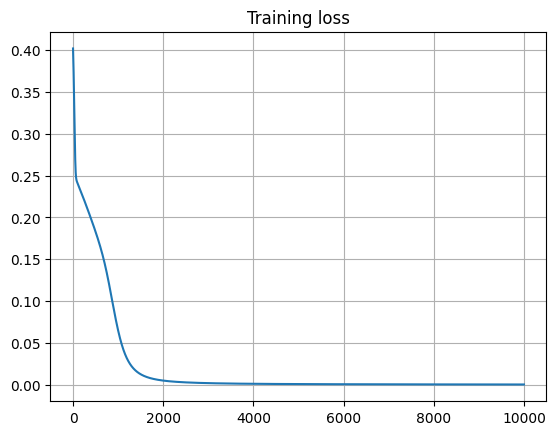

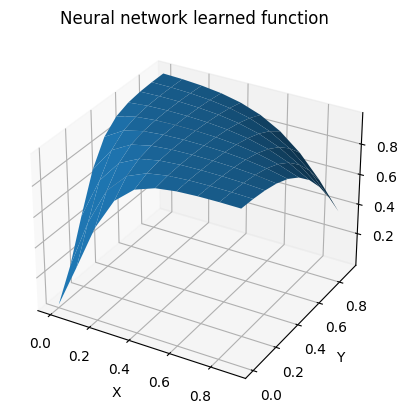

In [16]:
def data_generator(x1_data, x2_data, y_data):
    for i, x1 in enumerate(x1_data):
        x_data = np.array([x1, x2_data[i]])
        yield (x_data, y_data[i])


layers = [
    Dense(2, 4),
    Activation(activations.tanh, activations.tanh_gradient),
    Dense(4, 1),
    Activation(activations.tanh, activations.tanh_gradient)
]
net = NeuralNetwork(layers, learning_rate=0.01)

x1_train = np.array([0, 1, 0, 1], ndmin=2).T
x2_train = np.array([0, 0, 1, 1], ndmin=2).T
y_train = np.array([0, 1, 1, 0], ndmin=2).T

number_of_epochs = 10000
training_loss = []

for i in range(number_of_epochs):
    loss = 0
    for (x, y) in data_generator(x1_train, x2_train, y_train):
        y_hat = net.forward(x)
        loss += mse(y, y_hat)
        net.backward(mse_gradient(y_hat, y))
    training_loss.append(loss/4)

plt.plot(training_loss)
plt.grid()
plt.title("Training loss")

X = np.arange(0, 1, 0.1)
Y = np.arange(0, 1, 0.1)
X, Y = np.meshgrid(X, Y)

ax = plt.figure().add_subplot(projection='3d')
predictions = np.zeros_like(X)

for i in range(predictions.shape[0]):
    for j in range(predictions.shape[1]):
        result = np.array([X[i, j], Y[i, j]], ndmin=2).T
        result = net.forward(result)
        predictions[i, j] = result

ax.plot_surface(X, Y, predictions)
plt.title("Neural network learned function")
plt.xlabel("X")
plt.ylabel("Y")

## Neural network as universal function approximator

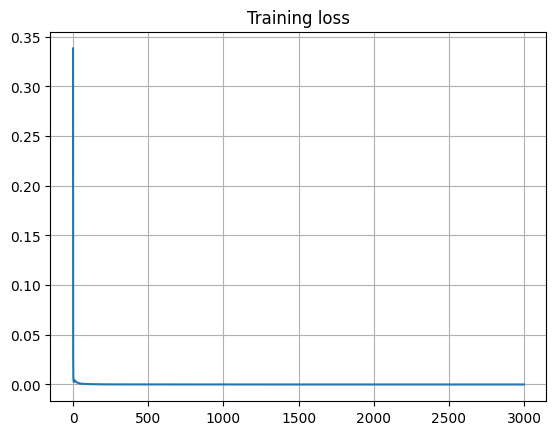

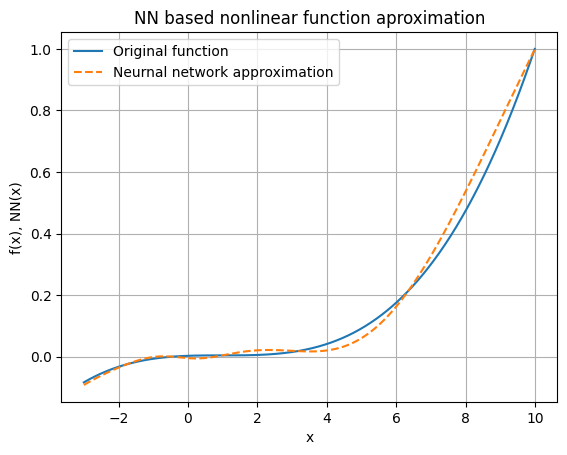

In [20]:
verbose = False
layers = [
    Dense(1, 10),
    Activation(activations.tanh, activations.tanh_gradient),
    Dense(10, 1)
]

net = NeuralNetwork(layers, learning_rate=0.001)

x_data = np.array(np.arange(-3, 10, 0.01), ndmin=2).T
y_data = (x_data-1)**3 + 3
y_data = y_data/np.max(y_data)

number_of_epochs = 3000
learning_rate = 0.001
training_loss = []

for i in range(number_of_epochs):
    loss = 0
    for j, x, in enumerate(x_data):
        # inference
        y_hat = net.forward(x)
        loss += mse(y_hat, y_data[j])

        # backward propagation
        net.backward(mse_gradient(y_hat, y_data[j]))
    training_loss.append(loss/x_data.size)
    if verbose is True:
        print("Epoch: {0}/{1} complete, loss: {2}".format(i + 1, number_of_epochs, loss/x_data.size))

plt.plot(training_loss)
plt.grid()
plt.title("Training loss")

out = []
for i in x_data:
    out.append(net.forward(i).item())

plt.figure()
plt.plot(x_data, y_data)
plt.plot(x_data, out, '--')
plt.grid()
plt.title("NN based nonlinear function aproximation")
plt.xlabel("x")
plt.ylabel("f(x), NN(x)")
plt.legend((("Original function"), ("Neurnal network approximation")))